# Регрессия

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# from sklearn.datasets import make_regression

font = {'size'   : 20}
plt.matplotlib.rc('font', **font)

Thesaurus с прошлой лекции:

* Признаки, таргет (features, target)
* модель (model)
* предсказание (prediction)
* функция ошибки (Loss function)
* выборка (sample)
* гиперпараметры
* правдоподобие (Likelihood)


## Постановка задачи регрессии

Постановка задачи регрессии: пусть есть признаки $\mathbf{x}_i \in \mathbb{R}^d$, и таргет $y_i \in \mathbb{R}$, которые образуют выборку $S=(\mathbf{x}_i, y_i)_{i=1}^N$. 

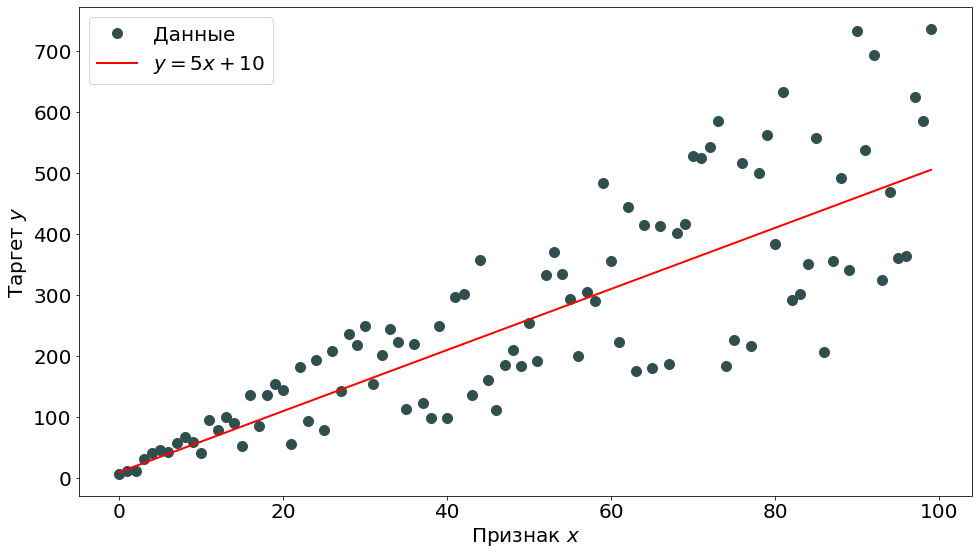

In [83]:
k_init = 5
b_init = 10

X = np.arange(0, 100)
y_real = k_init * X + b_init
noise = np.random.uniform(-3, 3, size=X.shape)
y_sampled = (noise + k_init) * X + b_init + noise

plt.figure(figsize=(16, 9))
plt.plot(X, y_sampled, 'o', color='darkslategray', label='Данные', markersize=10)
plt.plot(X, y_real, 'r-', label=r'$y = 5 x + 10$', linewidth=2)
plt.xlabel('Признак $x$')
plt.ylabel('Таргет $y$')
plt.legend()
# plt.savefig('init.png', dpi=300)
plt.show()

Необходимо построить модель $f$, которая на основании признаков предсказывает таргет: $f(\mathbf{x}_i) = \hat y_i \approx y_i$. 

Однако есть два вопроса:

1. Какую модель мы выберем?
2. Как мы будем оценивать её качество?

Предложение:

1. Линейная модель $\hat y_i = f(x_i) = kx_i + b$
2. Среднеквадратичная ошибка:

$$
L^{\mathrm{MSE}}(\mathbf{y}, \mathbf{\hat y}) = \frac{1}{N} \sum_{i=1}^N (y_i - \hat y_i)^2
$$

где $\mathbf{y} = (y_1, \ldots, y_N)^\mathrm{T}$, $\mathbf{\hat y} = (\hat y_1, \ldots, \hat y_N)^\mathrm{T}$

In [84]:
def mse(y, y_pred):
    return np.mean(np.square(y - y_pred))

In [85]:
print(mse(y_real, y_sampled))

10542.632719786758


Формулу линейной модели $\hat y_i = f(x_i) = kx_i + b$ можно переписать для всей выборки:
$$
\mathbf{\hat y} = \mathbf{X}\mathbf{w},
$$
где $\mathbf{X} = \begin{pmatrix} \mathbf{x}_1, 1\\ \ldots\\  \mathbf{x}_N, 1 \end{pmatrix} $, а $\mathbf{w} = (k, b)^T$

Тогда среднеквадратичная ошибка через матрицы:
$$
L^{\mathrm{MSE}}(\mathbf{y}, \mathbf{\hat y}) = L^{\mathrm{MSE}}(\mathbf{y}, \mathbf{X}\mathbf{w}) = \frac{1}{N} ||\mathbf{y}-\mathbf{X}\mathbf{w}||^2_2
$$

Минимум ошибки достигается при выполнении
$$
\mathbf{y} = \mathbf{X}\mathbf{w}
$$
или
$$
\mathbf{X}^\mathrm{T} \mathbf{y} = \mathbf{X}^\mathrm{T}\mathbf{X}\mathbf{w}
$$
или при 
$$
\mathbf{w} = (\mathbf{X}^\mathrm{T}\mathbf{X})^{-1}\mathbf{X}^\mathrm{T} \mathbf{y}
$$

In [86]:
def get_coef(X, y):
    ones = np.ones(X.shape[0])
    X_new = np.concatenate((X[np.newaxis], ones[np.newaxis]), axis=0).T
    return np.linalg.inv(X_new.T.dot(X_new)).dot(X_new.T).dot(y)

In [87]:
k, b = get_coef(X, y_sampled)

In [88]:
print(mse(y_sampled, k * X + b))

10415.253152343394


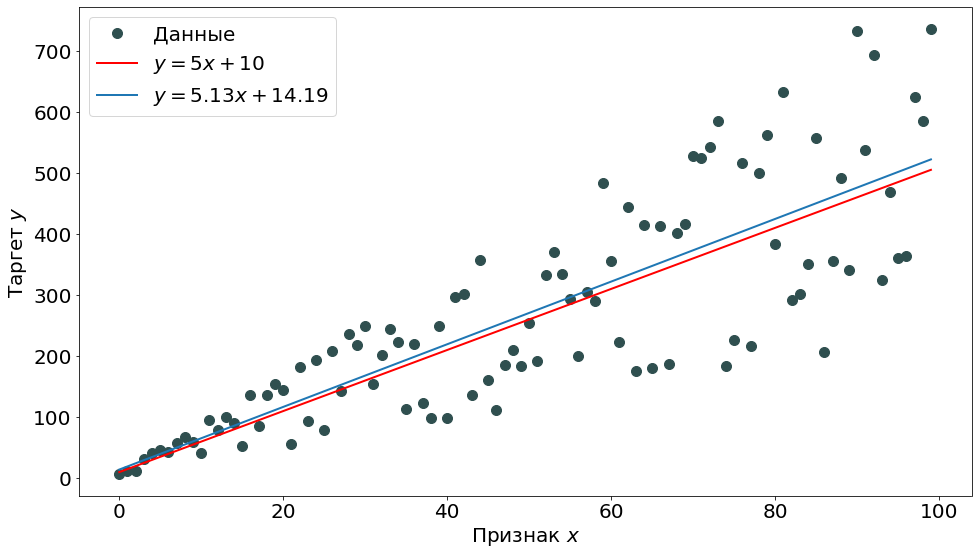

In [89]:
plt.figure(figsize=(16, 9))
plt.plot(X, y_sampled, 'o', color='darkslategray', label='Данные', markersize=10)
plt.plot(X, y_real, 'r-', label=r'$y = 5 x + 10$', linewidth=2)
plt.plot(X, k * X + b, '-', label=r'$y =$'f'{np.round(k,3)}'r'$x +$'f'{np.round(b,3)}', linewidth=2)
plt.xlabel('Признак $x$')
plt.ylabel('Таргет $y$')
#plt.ylim(0, 1.1*np.max(y_real))
plt.legend()
#plt.savefig('mse.png', dpi=300)
plt.show()

## Гребневая регрессия (Ridge regression)

$$
L^{\mathrm{Rigde}}(\mathbf{y}, \mathbf{\hat y}) =  \frac{1}{N} ||\mathbf{y}-\mathbf{X}\mathbf{w}||^2_2 + \lambda ||\mathbf{w}||^2_2
$$

Применяется в случаях, когда 
1. независимые переменные в $\mathbf{X}$ коррелируют друг с другом, что может приводить к слишком большим коэффициентам $\mathbf{w}$ (неустойчивость при вычислении $(\mathbf{X}^\mathrm{T}\mathbf{X})^{-1}$)
2. в выборке есть "очень шумные" точки

Можно показать, что $L^{\mathrm{Rigde}}$ принимает минимум в
$$
\mathbf{w} = (\mathbf{X}^\mathrm{T}\mathbf{X} + \lambda E)^{-1}\mathbf{X}^\mathrm{T} \mathbf{y}
$$

In [90]:
def get_coef_ridge(X, y, lambda_):
    ones = np.ones(X.shape[0])
    X_new = np.concatenate((X[np.newaxis], ones[np.newaxis]), axis=0).T
    return np.linalg.inv(X_new.T.dot(X_new) + lambda_ * np.eye(X_new.shape[1])).dot(X_new.T).dot(y)

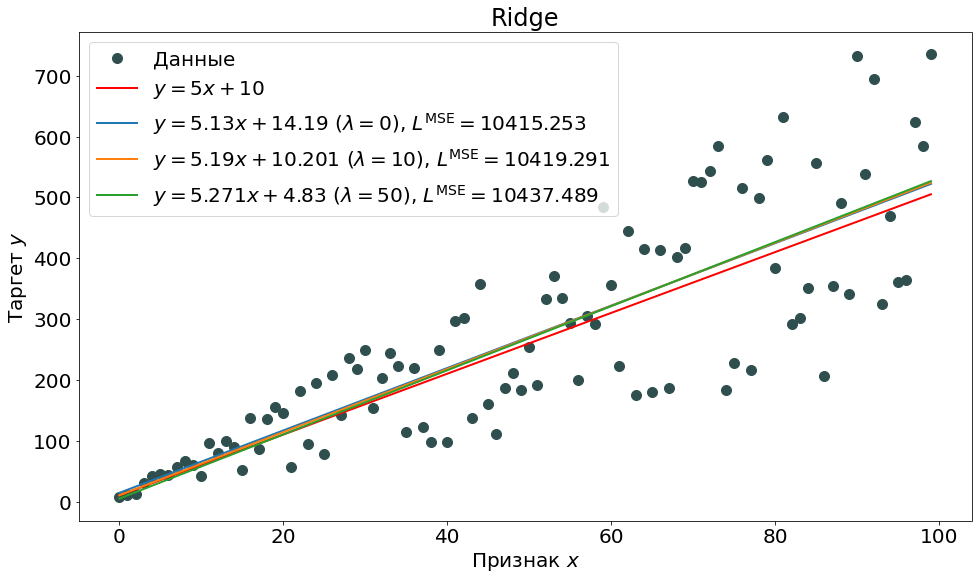

In [91]:
plt.figure(figsize=(16, 9))
plt.plot(X, y_sampled, 'o', color='darkslategray', label='Данные', markersize=10)
plt.plot(X, y_real, 'r-', label=r'$y = 5 x + 10$', linewidth=2)
for l in [0, 10, 50]:
    k, b = get_coef_ridge(X, y_sampled, l)
    y_pred = k * X + b
    label = r'$y =$'f'{np.round(k,3)}'r'$x +$'f'{np.round(b,3)}'\
    r' ($\lambda = $'f'{l})'\
    r', $L^{\mathrm{MSE}} = $'f'{np.round(mse(y_sampled, y_pred), 3)}'
    plt.plot(X, y_pred, '-', label=label, linewidth=2)
plt.xlabel('Признак $x$')
plt.ylabel('Таргет $y$')
plt.legend()
#plt.ylim(0, 1.1*np.max(y_real))
plt.title('Ridge')
#plt.savefig('ridge.png', dpi=300)
plt.show()

## Лассо-регрессия (LASSO, Least Absolute Shrinkage and Selection Operator)

$$
L^{\mathrm{LASSO}}(\mathbf{y}, \mathbf{\hat y}) =  \frac{1}{N} ||\mathbf{y}-\mathbf{X}\mathbf{w}||^2_2 + \lambda ||\mathbf{w}||_1
$$

In [92]:
from sklearn.linear_model import Lasso

<ipython-input-93-f1f532f4f3e6>:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X.reshape(-1, 1), y_sampled)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.208e+05, tolerance: 3.235e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


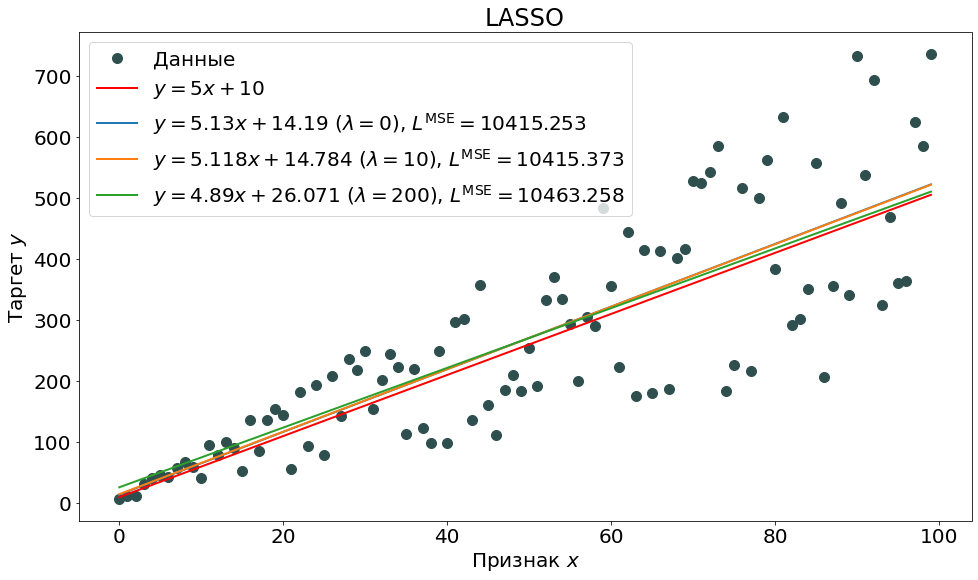

In [93]:
plt.figure(figsize=(16, 9))
plt.plot(X, y_sampled, 'o', color='darkslategray', label='Данные', markersize=10)
plt.plot(X, y_real, 'r-', label=r'$y = 5 x + 10$', linewidth=2)
for l in [0, 10, 200]:
    lasso = Lasso(alpha=l)
    lasso.fit(X.reshape(-1, 1), y_sampled)
    y_pred = lasso.predict(X.reshape(-1, 1))
    label = r'$y =$'f'{np.round(lasso.coef_[0],3)}'\
    r'$x +$'f'{np.round(lasso.intercept_,3)}'\
    r' ($\lambda = $'f'{l})'\
    r', $L^{\mathrm{MSE}} = $'f'{np.round(mse(y_sampled, y_pred), 3)}'
    plt.plot(X, y_pred, '-', label=label, linewidth=2)
plt.xlabel('Признак $x$')
plt.ylabel('Таргет $y$')
plt.legend()
plt.title('LASSO')
#plt.savefig('lasso.png', dpi=300)
plt.show()

## K-NN регрессия (K-NearestNeighbours)

In [94]:
from sklearn.neighbors import KNeighborsRegressor

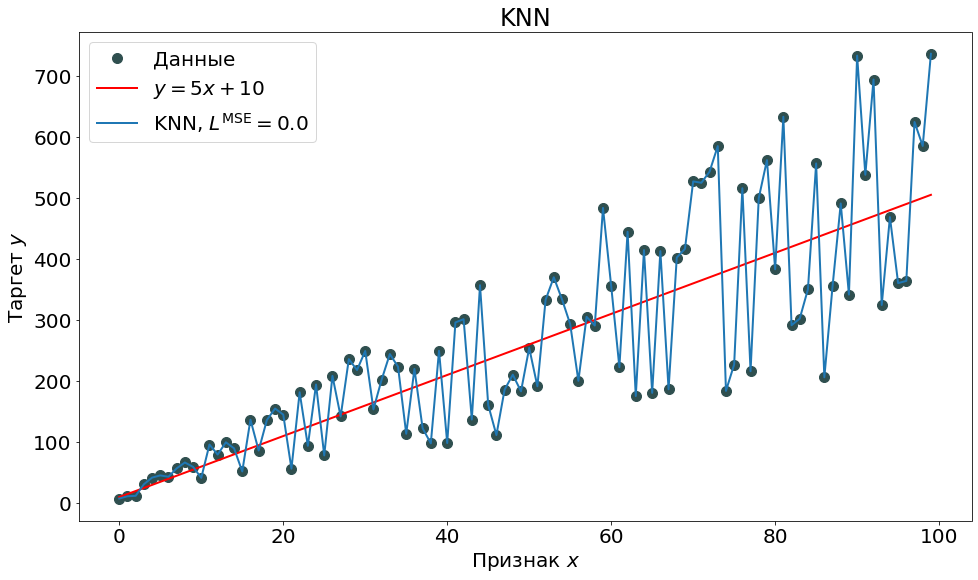

In [95]:
knn = KNeighborsRegressor(n_neighbors=1)

knn.fit(X.reshape(-1, 1), y_sampled)
y_pred = knn.predict(X.reshape(-1, 1))

plt.figure(figsize=(16, 9))
plt.plot(X, y_sampled, 'o', color='darkslategray', label='Данные', markersize=10)
plt.plot(X, y_real, 'r-', label=r'$y = 5 x + 10$', linewidth=2)
plt.plot(X, y_pred, '-', label=r'KNN, $L^{\mathrm{MSE}} = $'f'{np.round(mse(y_sampled, y_pred), 3)}', linewidth=2)
plt.xlabel('Признак $x$')
plt.ylabel('Таргет $y$')
#plt.ylim(0, 1.1*np.max(y_real))
plt.legend()
plt.title('KNN')
#plt.savefig('mse.png', dpi=300)
plt.show()

In [96]:
from sklearn.model_selection import train_test_split

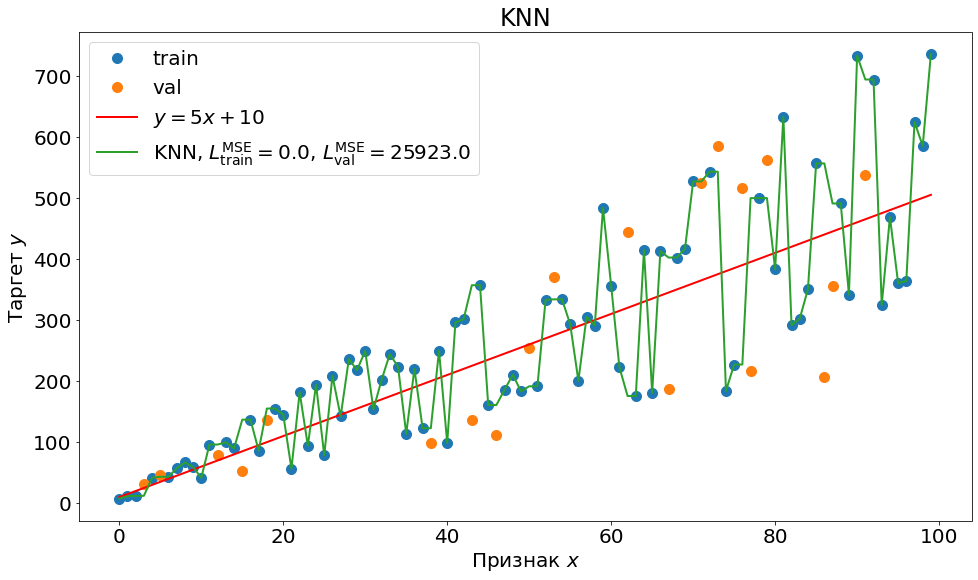

In [97]:
X_train, X_val, y_train, y_val = train_test_split(X, y_sampled, test_size=0.2)

knn = KNeighborsRegressor(n_neighbors=1)

knn.fit(X_train.reshape(-1, 1), y_train)
y_pred = knn.predict(X.reshape(-1, 1))
y_pred_train = knn.predict(X_train.reshape(-1, 1))
y_pred_val = knn.predict(X_val.reshape(-1, 1))

plt.figure(figsize=(16, 9))
plt.plot(X_train, y_train, 'o', label='train', markersize=10)
plt.plot(X_val, y_val, 'o', label='val', markersize=10)
plt.plot(X, y_real, 'r-', label=r'$y = 5 x + 10$', linewidth=2)
label = r'KNN, $L^{\mathrm{MSE}}_{\mathrm{train}} = $'f'{np.round(mse(y_train, y_pred_train))}'\
r', $L^{\mathrm{MSE}}_{\mathrm{val}} = $'f'{np.round(mse(y_val, y_pred_val))}'
plt.plot(X, y_pred, '-', label=label, linewidth=2)
plt.xlabel('Признак $x$')
plt.ylabel('Таргет $y$')
plt.legend()
plt.title('KNN')
plt.show()

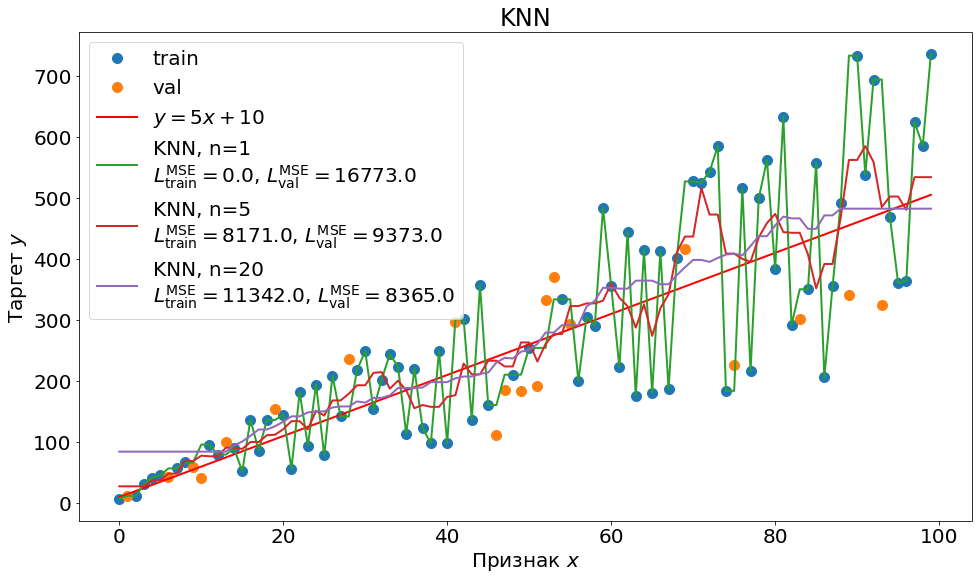

In [98]:
X_train, X_val, y_train, y_val = train_test_split(X, y_sampled, test_size=0.2)

knn = KNeighborsRegressor(n_neighbors=1)

knn.fit(X_train.reshape(-1, 1), y_train)
y_pred = knn.predict(X.reshape(-1, 1))
y_pred_train = knn.predict(X_train.reshape(-1, 1))
y_pred_val = knn.predict(X_val.reshape(-1, 1))

plt.figure(figsize=(16, 9))
plt.plot(X_train, y_train, 'o', label='train', markersize=10)
plt.plot(X_val, y_val, 'o', label='val', markersize=10)
plt.plot(X, y_real, 'r-', label=r'$y = 5 x + 10$', linewidth=2)
for n in [1, 5, 20]:
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train.reshape(-1, 1), y_train)
    y_pred = knn.predict(X.reshape(-1, 1))
    y_pred_train = knn.predict(X_train.reshape(-1, 1))
    y_pred_val = knn.predict(X_val.reshape(-1, 1))
    label = f'KNN, n={n}\n'r'$L^{\mathrm{MSE}}_{\mathrm{train}} = $'f'{np.round(mse(y_train, y_pred_train))}'\
    r', $L^{\mathrm{MSE}}_{\mathrm{val}} = $'f'{np.round(mse(y_val, y_pred_val))}'
    plt.plot(X, y_pred, '-', label=label, linewidth=2)
plt.xlabel('Признак $x$')
plt.ylabel('Таргет $y$')
plt.legend()
plt.title('KNN')
plt.show()